# **Working with data in Python, Confidence Intervals and Dispersion**

Throughout this course, all of these Google Colab Jupyter notebooks will utilize Python and a powerful library known as Pandas. Pandas allows us to import data to manipulate, display, and analyze. Some other libraries we will use in conjunction with Pandas are:
* NumPy
* Matplotlib
* SciPy

Although comfort with Python and the Pandas library is not necessary for successful completion of the course, it is a very valuable skill to learn! Pandas gives a lot of flexibility when it comes to manipulating your data. Therefore, you are highly encouraged to inspect the code as you perform your analyses in this course.

### **Imports**

If we want to utilize Pandas, the first thing we must do in our Python program is import the package.

In [1]:
import pandas as pd

For ease of use, we give a short alias for the package name, `pd`. That way, we don't have to type in `pandas` every time we reference something from the package.

We will also import another library, NumPy, to perform certain calculations on our data. Again, we assign the short alias `np` to `numpy`.

Fun fact: The Pandas library is built on top of NumPy!

In [2]:
import numpy as np

Additionally, we will import a third library, Matplotlib, which we will use to make plots of our data. Similarly, we use an alias `plt` for the `pyplot` module.

In [3]:
import matplotlib.pyplot as plt

Finally, there are some other imports for this particular notebook. Don't worry about these; these imports are only used in this notebook to access files from Google Drive, make displaying the data more organized, and calculate certain statistics.

In [4]:
from IPython.display import display, HTML

from scipy.stats import iqr, t
from statsmodels.stats.proportion import proportion_confint

from google.colab import drive
drive.mount('/content/drive', force_remount=False)

pd.options.display.float_format = '{:.8g}'.format

Mounted at /content/drive


In [5]:
#@title ### **Define Functions**
#@markdown This is a helper function that will help display our data tables with a title. Here is where we use those additional imports from before!

def title_display(df, title):
  '''
  Displays a DataFrame with a specified title.
  '''
  display(HTML(f"<h3>{title}</h3>"))
  display(df)

In [6]:
#@title ### **Download File and Select Data**

#@markdown Make sure the file containing the data you wish to analyze is in your Google Drive
file_type = "xlsx" #@param ["csv", "xlsx"]
file_name = 'Hurricanes.xlsx' #@param ["estradiol.csv", "Hot Dogs.xlsx"] {type:"string", allow-input: true}
# Hot Dogs.xlsx
#@markdown Check the below box to inspect the imported data.
show_frame = True #@param {type:"boolean"}
#@markdown Show just first five? (Reduces screen clutter)
first_five = True #@param {type:"boolean"}

file_path = f"/content/drive/MyDrive/{file_name}"

match file_type:
  case "csv":
    data = pd.read_csv(file_path)
  case "xlsx":
    data = pd.read_excel(file_path)

#@markdown ---
if show_frame:
  if first_five:
    display(data.head())
  else:
    display(data)

,Year,Month,Day,Time,ID,Name,Latitude,Longitude,Wind (Knots),Atmospheric Pressure,Storm Category,Ocean Basin,Date,Landfall in USA,Name and ID
0,1930,8,21,1800Z,581,NOTNAMED,19.6,-51.5,35,0,TS,North Atlantic,1930-08-21,0,NOTNAMED_581
1,1930,8,22,0000Z,581,NOTNAMED,20.8,-55.1,35,0,TS,North Atlantic,1930-08-22,0,NOTNAMED_581
2,1930,8,22,0600Z,581,NOTNAMED,21,-55.8,35,0,TS,North Atlantic,1930-08-22,0,NOTNAMED_581
3,1930,8,22,1200Z,581,NOTNAMED,21.3,-56.6,35,0,TS,North Atlantic,1930-08-22,0,NOTNAMED_581
4,1930,8,22,1800Z,581,NOTNAMED,21.5,-57.2,35,0,TS,North Atlantic,1930-08-22,0,NOTNAMED_581


You should be able to see your data in the table above. In Pandas, this is what is known as a `DataFrame`.

In this case, we have declared a variable called `data` that we use to reference this `DataFrame` object. However, we could have used nearly any other name if we chose to!

### **Creating New Columns**

Our first task is to create a new column in our `DataFrame` by transforming another column. Unlike in other software, we cannot click or type to interact with our `DataFrame`; we must write simple code that does what we want.

Suppose we had a column in our `DataFrame` called `'Grades'`, and we would like to add 5 to each score. In this case, we would do the following:
```
data['Improved Grades'] = data['Grades'] + 5
```
More generally, it can look like this:
```
data['New Column Name'] = data['Existing Column Name']
```
Notice the pattern here. You can replace `'New Column Name'` with whatever you want to name your column, and replace `'Existing Column Name'` with whatever existing column you would like to reference. **Make sure that you include the single or double quotation marks surrounding the name!** You can also apply any actions you would like to the existing column, and the changes will only be saved in the new column.

Now, back to the task at hand. In our Hurricanes dataset, we would like to take the log (logarithm) of the values in our `Wind(Knots)` column.

<u>It's your turn! Using the pattern discussed above, fill in the blank to create this new column, `Log(Wind (Knots))`.</u>

In [8]:
data[______] = np.log(data['Wind (Knots)'])

Now let's display our `DataFrame`.

In [9]:
title_display(data, "DataFrame with Added Column")

,Year,Month,Day,Time,ID,Name,Latitude,Longitude,Wind (Knots),Atmospheric Pressure,Storm Category,Ocean Basin,Date,Landfall in USA,Name and ID,Log(Wind (Knots))
0,1930,8,21,1800Z,581,NOTNAMED,19.6,-51.5,35,0,TS,North Atlantic,1930-08-21,0,NOTNAMED_581,3.5553481
1,1930,8,22,0000Z,581,NOTNAMED,20.8,-55.1,35,0,TS,North Atlantic,1930-08-22,0,NOTNAMED_581,3.5553481
2,1930,8,22,0600Z,581,NOTNAMED,21,-55.8,35,0,TS,North Atlantic,1930-08-22,0,NOTNAMED_581,3.5553481
3,1930,8,22,1200Z,581,NOTNAMED,21.3,-56.6,35,0,TS,North Atlantic,1930-08-22,0,NOTNAMED_581,3.5553481
4,1930,8,22,1800Z,581,NOTNAMED,21.5,-57.2,35,0,TS,North Atlantic,1930-08-22,0,NOTNAMED_581,3.5553481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23928,2008,11,13,0000Z,1410,PALOMA,22.1,-82.8,20,1010,L,North Atlantic,2008-11-13,0,PALOMA_1410,2.9957323
23929,2008,11,13,0600Z,1410,PALOMA,22.8,-83.8,20,1010,L,North Atlantic,2008-11-13,0,PALOMA_1410,2.9957323
23930,2008,11,13,1200Z,1410,PALOMA,23.8,-84.7,20,1010,L,North Atlantic,2008-11-13,0,PALOMA_1410,2.9957323
23931,2008,11,13,1800Z,1410,PALOMA,25,-85.5,20,1010,L,North Atlantic,2008-11-13,0,PALOMA_1410,2.9957323


If you look all the way on the right, you will see your new column.

Congratulations! Now you know how to create new columns in your `DataFrame`.

### **Creating Random Columns**

Our next task is very similar: we want to create several random columns with the following ranges:
* Integers 1 - 10
* Integers 1 - 1000
* Integers 57 - 92
* Decimal Numbers 2.49 - 11.11

Let's start with the first example. NumPy has a helpful function called `randint` from the `random` module that can use to generate random integers!
```
np.random.randint(low, high, size)
```

So, if we specify a `low` boundary, a `high` boundary, and a `size`, we can generate a column of random integers!

One very important thing to note is that the `high` boundary for this function is exclusive. Suppose you have the following:
```
np.random.randint(1 ,5, size)
```
In this case, the number 5 is not actually included in the possible integers to be chosen; only integers 1, 2, 3, and 4 can ever be selected. To compensate for this, simply increment your `high` boundary by 1.

So, for first example:
* `low = 1`
* `high = 11`

How about the size? Our `DataFrame` has a property known as shape. Go ahead and inspect it below!

In [10]:
data.shape

(23933, 16)

As you can see, this ordered pair contains the number of rows and number of columns respectively. To access the first element of the shape, we can write the following:
```
data.shape[0]
```

So, finally, to generate random integers 1 - 10, we write the following code:

In [11]:
data['Random 1-10'] = np.random.randint(1, 11, data.shape[0])

<u>Now, use this pattern to fill in the blanks and generate the other two sets of random integers!</u>

In [ ]:
data['Random 1 - 1000'] = np.random.randint(_, _, _)
data['Random 57 - 92'] = np.random.randint(_, _, _)

Now how about decimal numbers? We can use a similar function from NumPy's `random` module called `uniform`:

```
np.random.uniform(low, high, size)
```

<u>Use this pattern once to fill in the blanks and generate the set of random decimal numbers!</u>

In [ ]:
data['Random 2.49 - 11.11'] = np.random.uniform(_, _, _)

Let's go ahead and display our `DataFrame` once again to verify that we have generated this random columns.

In [14]:
title_display(data, "DataFrame with Random Columns")

,Year,Month,Day,Time,ID,Name,Latitude,Longitude,Wind (Knots),Atmospheric Pressure,Storm Category,Ocean Basin,Date,Landfall in USA,Name and ID,Log(Wind (Knots)),Random 1-10
0,1930,8,21,1800Z,581,NOTNAMED,19.6,-51.5,35,0,TS,North Atlantic,1930-08-21,0,NOTNAMED_581,3.5553481,8
1,1930,8,22,0000Z,581,NOTNAMED,20.8,-55.1,35,0,TS,North Atlantic,1930-08-22,0,NOTNAMED_581,3.5553481,6
2,1930,8,22,0600Z,581,NOTNAMED,21,-55.8,35,0,TS,North Atlantic,1930-08-22,0,NOTNAMED_581,3.5553481,9
3,1930,8,22,1200Z,581,NOTNAMED,21.3,-56.6,35,0,TS,North Atlantic,1930-08-22,0,NOTNAMED_581,3.5553481,10
4,1930,8,22,1800Z,581,NOTNAMED,21.5,-57.2,35,0,TS,North Atlantic,1930-08-22,0,NOTNAMED_581,3.5553481,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23928,2008,11,13,0000Z,1410,PALOMA,22.1,-82.8,20,1010,L,North Atlantic,2008-11-13,0,PALOMA_1410,2.9957323,3
23929,2008,11,13,0600Z,1410,PALOMA,22.8,-83.8,20,1010,L,North Atlantic,2008-11-13,0,PALOMA_1410,2.9957323,5
23930,2008,11,13,1200Z,1410,PALOMA,23.8,-84.7,20,1010,L,North Atlantic,2008-11-13,0,PALOMA_1410,2.9957323,7
23931,2008,11,13,1800Z,1410,PALOMA,25,-85.5,20,1010,L,North Atlantic,2008-11-13,0,PALOMA_1410,2.9957323,2


### **Computations on Continuous Numeric Variables**

Good job so far! We now are tasked with computing the following values on all our continuous numeric variables:

* Sum
* Mean
* SEM
* Maximum Number
* Minimum Number
* Median
* Standard Deviation
* Variance
* Skewness
* Kurtosis
* Mode
* Interquartile Range
* Confidence Intervals

Let's trim down our `DataFrame` to only the continuous numeric variables. But before we do that, let's extract some categorical variables that we want to analyze later.

In [15]:
cat_data = data[['Storm Category', 'Landfall in USA']]

Now, let's try to start by first isolating all our numeric variables. Luckily, Pandas can do that for us with the following method:

In [16]:
data = data.select_dtypes('number')

Note that, since we are reassigning the `data` variable to the result of this method, we are losing the non-numeric variables. If these variables are still important for other analysis, you may want to consider assigning the result of this method to a new variable.

Now, let's see our new `DataFrame`!

In [17]:
title_display(data, "Numeric Variables")

,Year,Month,Day,ID,Latitude,Longitude,Wind (Knots),Atmospheric Pressure,Landfall in USA,Log(Wind (Knots)),Random 1-10
0,1930,8,21,581,19.6,-51.5,35,0,0,3.5553481,8
1,1930,8,22,581,20.8,-55.1,35,0,0,3.5553481,6
2,1930,8,22,581,21,-55.8,35,0,0,3.5553481,9
3,1930,8,22,581,21.3,-56.6,35,0,0,3.5553481,10
4,1930,8,22,581,21.5,-57.2,35,0,0,3.5553481,1
...,...,...,...,...,...,...,...,...,...,...,...
23928,2008,11,13,1410,22.1,-82.8,20,1010,0,2.9957323,3
23929,2008,11,13,1410,22.8,-83.8,20,1010,0,2.9957323,5
23930,2008,11,13,1410,23.8,-84.7,20,1010,0,2.9957323,7
23931,2008,11,13,1410,25,-85.5,20,1010,0,2.9957323,2


This is better, but we still have some discrete variables to take care of. In this case, it is best to manually inspect the data, as some variables may or may not be continuous depending on the context.

To select multiple columns from a `DataFrame`, we can do the following:
```
data[['Column 1', 'Column 2', 'Column 3']]
```

Note two things: we can have as many columns as we would like (not limited to just 3), and we use an additional set of square brackets when selecting multiple columns.

<u>Using this knowledge, fill in the blanks and select only the variables that are continuous (omitting the random columns we created earlier)!</u>

In [18]:
data = data[_____]

And let's see our new `DataFrame`!

In [19]:
title_display(data, "Continuous Numeric Variables")

,Latitude,Longitude,Wind (Knots),Log(Wind (Knots))
0,19.6,-51.5,35,3.5553481
1,20.8,-55.1,35,3.5553481
2,21,-55.8,35,3.5553481
3,21.3,-56.6,35,3.5553481
4,21.5,-57.2,35,3.5553481
...,...,...,...,...
23928,22.1,-82.8,20,2.9957323
23929,22.8,-83.8,20,2.9957323
23930,23.8,-84.7,20,2.9957323
23931,25,-85.5,20,2.9957323


Perfect! Now we can perform the calculations.

This code may look very complicated, but for our purposes it is not necessary to understand each and every detail.

In summary, the below code will calculate each of the required values (Mean, Std Dev, etc.) for **every column** in our trimmed `DataFrame`, and then store those values into their own `DataFrame`. Every new `DataFrame` is displayed in the output.

In [20]:
crit_t = t.ppf(1-0.025,df=data.shape[0]-1)
for col in data.columns:
  statistics = {
      'Mean': [mean:=data[col].mean()],
      'Std Dev': [data[col].std()],
      'Std Err Mean': [sem:=data[col].sem()],
      'Lower 95%': [mean - crit_t*sem],
      'Upper 95%': [mean + crit_t*sem],
      'N': [data.shape[0]],
      'Sum': [data[col].sum()],
      'Variance': [data[col].var()],
      'Skewness': [data[col].skew()],
      'Kurtosis': [data[col].kurtosis()],
      'Minimum': [data[col].min()],
      'Maximum': [data[col].max()],
      'Median': [data[col].median()],
      'Mode': [min_mode:=min(mode:=list(data[col].mode()))],
      'IQR': [iqr(data[col], nan_policy='omit')],

  }
  title_display(pd.DataFrame(statistics).T, col)
  if len(mode) > 1:
    print(f"Note: The mode shown is the smallest of {len(mode)} modes with a count of {data[col].value_counts()[min_mode]}.")

,0
Mean,26.959228
Std Dev,9.7618184
Std Err Mean,0.063100406
Lower 95%,26.835547
Upper 95%,27.082909
N,23933
Sum,645215.2
Variance,95.293099
Skewness,0.56133647
Kurtosis,0.17788353


,0
Mean,-65.42423
Std Dev,19.2107
Std Err Mean,0.12417799
Lower 95%,-65.667627
Upper 95%,-65.180833
N,23933
Sum,-1565798.1
Variance,369.05099
Skewness,0.41197302
Kurtosis,-0.36382297


Note: The mode shown is the smallest of 2 modes with a count of 81.


,0
Mean,53.728952
Std Dev,25.962188
Std Err Mean,0.16781962
Lower 95%,53.400015
Upper 95%,54.057889
N,23933
Sum,1285895
Variance,674.03521
Skewness,0.99175515
Kurtosis,0.54903305


,0
Mean,3.8730765
Std Dev,0.47184554
Std Err Mean,0.0030500102
Lower 95%,3.8670983
Upper 95%,3.8790547
N,23933
Sum,92694.339
Variance,0.22263822
Skewness,0.045714799
Kurtosis,-0.54049603


### **Plotting Histograms**

This code is much simpler; for each of our columns, we plot a histogram and assign a label to the x-axis.

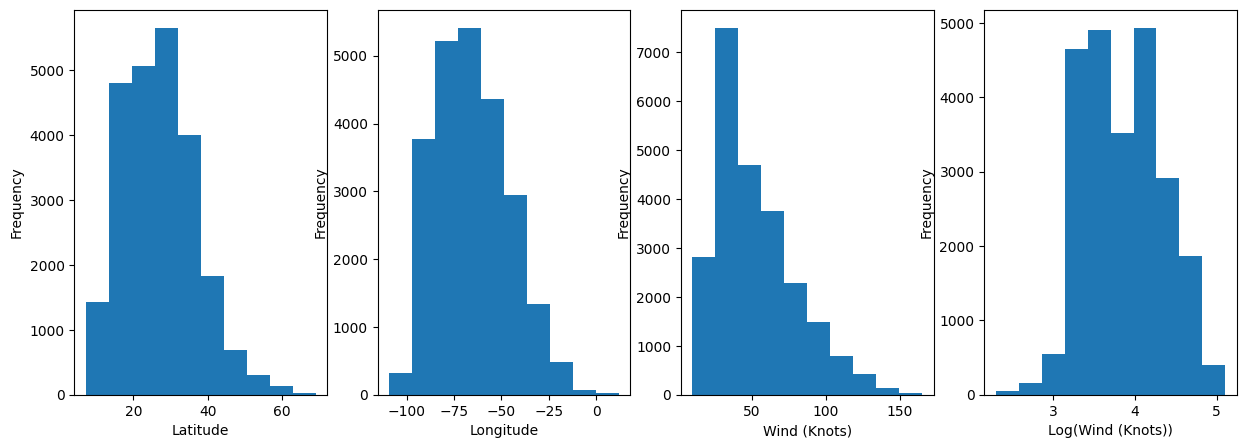

In [24]:
fig, axs = plt.subplots(1, len(data.columns), figsize=(15, 5))
for i, col in enumerate(data.columns):
    data[col].plot.hist(ax=axs[i])
    axs[i].set_xlabel(col)

plt.show()

### **Plotting Boxplots**



In a very similar fashion, we will make boxplots for each of our columns.

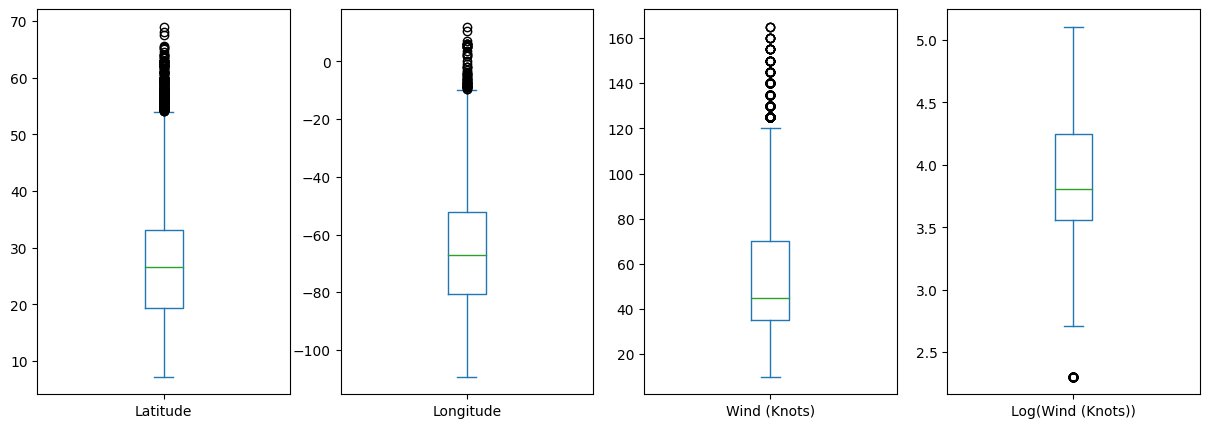

In [25]:
fig, axs = plt.subplots(1, len(data.columns), figsize=(15, 5))
for i, col in enumerate(data.columns):
    data[col].plot.box(ax=axs[i])

plt.show()

### **Categorical Variables**

Don't forget, we still want to analyze our categorical variables! Unlike before, our data points aren't numbers here, so we can't calculate values like mean, standard deviation, etc.

Let's start with frequency tables! Here, we ue a handy function called `value_counts` that will find the frequency of each unique value in the column. We also normalize the frequency table to get proportions.

In [ ]:
for col in cat_data.columns:
  title_display((pd.DataFrame(cat_data[col].value_counts(normalize=True))), f"Frequencies for {col}")

,Storm Category
TS,0.375005
TD,0.177746
H1,0.163415
E,0.086241
H2,0.072954
H3,0.041700
H4,0.028496
SS,0.020390
L,0.015460
SD,0.010320


,Landfall in USA
0,0.845611
1,0.154389


Now, let's plot histograms. Note here that, since we need numbers to be able to plot, we are using `value_counts` again.

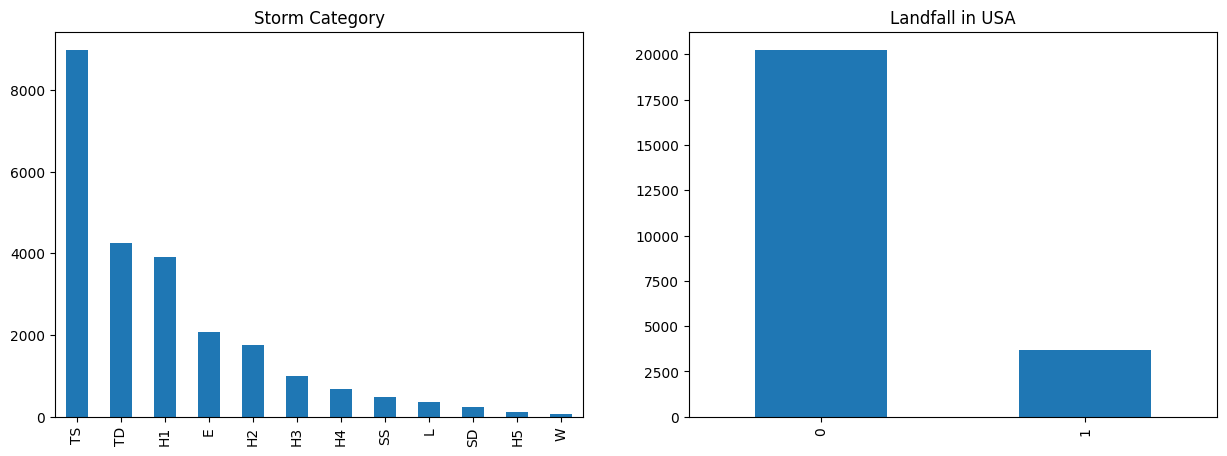

In [27]:
fig, axs = plt.subplots(1, len(cat_data.columns), figsize=(15, 5))
for i, col in enumerate(cat_data.columns):
    cat_data[col].value_counts().plot(ax=axs[i], kind='bar', title=col)

plt.show()

Finally, let's generate confidence intervals for each unique value in each column. Note that we can specify our alpha level by changing the value of the alpha variable at the top.

In [ ]:
alpha = 0.05
for col in cat_data.columns:
  values = pd.DataFrame(cat_data[col].value_counts().rename('Count'))
  values['Prob'] = cat_data[col].value_counts(True)
  values['Lower CI'], values['Upper CI'] = proportion_confint(values['Count'], cat_data[col].count(), alpha=alpha, method='agresti_coull')
  values['1-Alpha'] = pd.Series(1-alpha, index=values.index)
  title_display(values, col)

,Count,Prob,Lower CI,Upper CI,1-Alpha
TS,8975,0.375005,0.368892,0.381158,0.95
TD,4254,0.177746,0.172954,0.182642,0.95
H1,3911,0.163415,0.158784,0.168153,0.95
E,2064,0.086241,0.082750,0.089865,0.95
H2,1746,0.072954,0.069726,0.076318,0.95
H3,998,0.041700,0.039239,0.044308,0.95
H4,682,0.028496,0.026461,0.030682,0.95
SS,488,0.020390,0.018674,0.022261,0.95
L,370,0.015460,0.013971,0.017104,0.95
SD,247,0.010320,0.009114,0.011684,0.95


,Count,Prob,Lower CI,Upper CI,1-Alpha
0,20238,0.845611,0.840977,0.850133,0.95
1,3695,0.154389,0.149867,0.159023,0.95
